In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from imblearn.ensemble import RUSBoostClassifier
warnings.filterwarnings('ignore')

In [9]:
import os
os.listdir('../data')

['creditcard.csv', 'valid.csv', 'train.csv', 'test.csv']

In [10]:
train = pd.read_csv('../data/train.csv')
valid = pd.read_csv('../data/valid.csv')
test = pd.read_csv('../data/test.csv')

In [11]:
train.shape

(142403, 31)

In [12]:
train.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [13]:
train['Class'].value_counts() / len(train)

0    0.998251
1    0.001749
Name: Class, dtype: float64

# RUSBoosting

In [14]:
X_train, y_train = train.drop('Class', axis=1), train['Class']
X_valid, y_valid = valid.drop('Class', axis=1), valid['Class']
X_test, y_test = test.drop('Class', axis=1), test['Class']

## RUS(0.1)

In [15]:
clf = RUSBoostClassifier(n_estimators=100, sampling_strategy=0.1, random_state=0)
clf.fit(X_train, y_train)

RUSBoostClassifier(n_estimators=100, random_state=0, sampling_strategy=0.1)

In [16]:
pred_train_prob = clf.predict_proba(X_train)
pred_valid_prob = clf.predict_proba(X_valid)
pred_test_prob = clf.predict_proba(X_test)

In [17]:
from utils import print_metrics, plot_roc_curve, plot_pr_curve, threshold_tuning_f1_score_plot

In [18]:
print('[train]')
print_metrics(y_train, pred_train_prob[:, 1])
print('[valid]')
print_metrics(y_valid, pred_valid_prob[:, 1])
print('[test]')
print_metrics(y_test, pred_test_prob[:, 1])

[train]
ROCAUC = 0.999
PRAUC = 0.798
[valid]
ROCAUC = 0.922
PRAUC = 0.668
[test]
ROCAUC = 0.963
PRAUC = 0.716


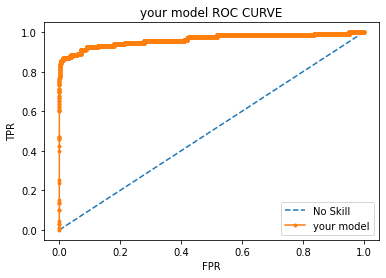

In [19]:
plot_roc_curve(y_test, pred_test_prob[:, 1])

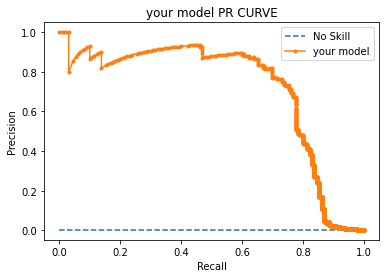

In [20]:
plot_pr_curve(y_test, pred_test_prob[:, 1])

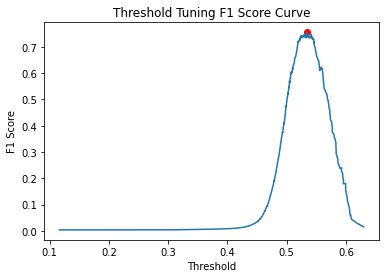

In [21]:
threshold_tuning_f1_score_plot(y_test, pred_test_prob[:, 1])